In [1]:
import sys
sys.path.append('..')
from MPRA_exp.utils import *
os.chdir('../../data/AgarwalMPRA')

In [2]:
table_s3 = pd.ExcelFile('supp_materials/media-6.xlsx')
print(table_s3.sheet_names)
table_s4 = pd.ExcelFile('supp_materials/media-7.xlsx')
print(table_s4.sheet_names)

['joint library']
['all_cell_types_summary', 'all_cell_types_ESS', 'HepG2_replicate_level', 'HepG2_summary_data', 'K562_replicate_level', 'K562_summary_data', 'WTC11_replicate_level', 'WTC11_summary_data']


In [7]:
df_joint_library = pd.read_excel('supp_materials/media-6.xlsx', header=1, sheet_name='joint library')
print(df_joint_library.shape)

df_all_cell_types_summary = pd.read_excel('supp_materials/media-7.xlsx', sheet_name='all_cell_types_summary')
print(df_all_cell_types_summary.shape)

df_table = pd.merge(df_joint_library, df_all_cell_types_summary, on='name', how='inner')
print(df_table.shape)
df_table

(60000, 11)
(56981, 4)
(56979, 14)


,name,category,chr.hg19,start.hg19,stop.hg19,str.hg19,chr.hg38,start.hg38,stop.hg38,str.hg38,230nt sequence (15nt 5' adaptor - 200nt element - 15nt 3' adaptor),HepG2 [log2(rna/dna)],K562 [log2(rna/dna)],WTC11 [log2(rna/dna)]
0,WTC11_seq1000_F,"putative enhancer, WTC11",NaN,NaN,NaN,NaN,1,19461350.0,19461550.0,+,AGGACCGGATCAACTGTAGGACCAGGCTCTGCCTCCTTCTCTCTCC...,0.633,0.080,-0.387
1,WTC11_seq10002_F,"putative enhancer, WTC11",NaN,NaN,NaN,NaN,10,88965538.0,88965738.0,+,AGGACCGGATCAACTTGTACTTGCCTTAGGAGGTCAAACACATTAG...,-1.157,-1.147,-1.507
2,WTC11_seq10004_F,"putative enhancer, WTC11",NaN,NaN,NaN,NaN,10,89029900.0,89030100.0,+,AGGACCGGATCAACTTAGCTCAACACAAATCCATCACTGAAAGCAG...,-0.066,0.186,0.655
3,WTC11_seq10005_F,"putative enhancer, WTC11",NaN,NaN,NaN,NaN,10,89032143.0,89032343.0,+,AGGACCGGATCAACTGACCCTAAATCAGTATGGGGAAAGGTCCCCA...,0.846,1.212,-0.637
4,WTC11_seq10007_F,"putative enhancer, WTC11",NaN,NaN,NaN,NaN,10,89111910.0,89112110.0,+,AGGACCGGATCAACTGTGATCTCAGCTTACTGCAACCTCTGCCTCC...,-0.784,-0.630,-0.612
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56974,C:SLEA_hg18:chr9:82902419-82902586|59:V_AHRARN...,"negative HepG2, Smith",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AGGACCGGATCAACTCCAAGTCTGCCATCGTGTTCAGAAGGGCCAG...,-1.192,-1.080,-1.680
56975,C:SLEA_hg18:chr9:82902419-82902586|59:V_GATA4_...,"negative HepG2, Smith",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AGGACCGGATCAACTCCAAGTCTGCCATCGTGTTCAGAAGGGCCAG...,-0.582,-1.094,-1.637
56976,C:SLEA_hg18:chr9:82902419-82902586|6:V_HNF3ALP...,"negative HepG2, Smith",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AGGACCGGATCAACTCCAAGTCTGCCATCGTGTTCATGTTTGCTTT...,-0.855,-0.554,-1.083
56977,C:SLEA_hg18:chr9:82902419-82902586|67:V_PPARA_...,"negative HepG2, Smith",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AGGACCGGATCAACTCCAAGTCTGCCATCGTGTTCAGAAGGGCCAG...,-1.231,-0.927,-1.606


In [9]:
df_table = df_table.rename(columns={'230nt sequence (15nt 5\' adaptor - 200nt element - 15nt 3\' adaptor)': 'seq',
                                    'mean': 'exp',
                                    'chr.hg38': 'chr',
                                    'start.hg38':'start',
                                    'stop.hg38': 'end',
                                    'str.hg38': 'strand',
                                    'HepG2 [log2(rna/dna)]': 'HepG2',
                                    'K562 [log2(rna/dna)]': 'K562',
                                    'WTC11 [log2(rna/dna)]': 'WTC11'})

df_table = df_table[['seq', 'chr', 'HepG2', 'K562', 'WTC11']]
df_table['chr'] = 'chr' + df_table['chr'].astype(str)
df_table['seq'] = df_table['seq'].str.slice(15, -15)
df_table = df_table.dropna(subset=['HepG2', 'K562', 'WTC11'])
print(df_table.shape)
df_table

(56975, 5)


,seq,chr,HepG2,K562,WTC11
0,GTAGGACCAGGCTCTGCCTCCTTCTCTCTCCCCCGACCCACCTGCC...,chr1,0.633,0.080,-0.387
1,TGTACTTGCCTTAGGAGGTCAAACACATTAGGTATACCAACATATC...,chr10,-1.157,-1.147,-1.507
2,TAGCTCAACACAAATCCATCACTGAAAGCAGTGCAACCAAGGCAGC...,chr10,-0.066,0.186,0.655
3,GACCCTAAATCAGTATGGGGAAAGGTCCCCACTGCAGCACTTTCTA...,chr10,0.846,1.212,-0.637
4,GTGATCTCAGCTTACTGCAACCTCTGCCTCCTGGGTTCAAGCAATT...,chr10,-0.784,-0.630,-0.612
...,...,...,...,...,...
56974,CCAAGTCTGCCATCGTGTTCAGAAGGGCCAGAAATGCCAAGGACTC...,chrnan,-1.192,-1.080,-1.680
56975,CCAAGTCTGCCATCGTGTTCAGAAGGGCCAGAAATGCCAAGGACTC...,chrnan,-0.582,-1.094,-1.637
56976,CCAAGTCTGCCATCGTGTTCATGTTTGCTTTGAATGCCAAGGTGTT...,chrnan,-0.855,-0.554,-1.083
56977,CCAAGTCTGCCATCGTGTTCAGAAGGGCCAGAAATGCCAAGGACTC...,chrnan,-1.231,-0.927,-1.606


In [10]:
df_table.to_csv('Agarwal_joint.csv', index=False)

In [11]:
df = pd.read_csv('Agarwal_joint.csv')
df

,seq,chr,HepG2,K562,WTC11
0,GTAGGACCAGGCTCTGCCTCCTTCTCTCTCCCCCGACCCACCTGCC...,chr1,0.633,0.080,-0.387
1,TGTACTTGCCTTAGGAGGTCAAACACATTAGGTATACCAACATATC...,chr10,-1.157,-1.147,-1.507
2,TAGCTCAACACAAATCCATCACTGAAAGCAGTGCAACCAAGGCAGC...,chr10,-0.066,0.186,0.655
3,GACCCTAAATCAGTATGGGGAAAGGTCCCCACTGCAGCACTTTCTA...,chr10,0.846,1.212,-0.637
4,GTGATCTCAGCTTACTGCAACCTCTGCCTCCTGGGTTCAAGCAATT...,chr10,-0.784,-0.630,-0.612
...,...,...,...,...,...
56970,CCAAGTCTGCCATCGTGTTCAGAAGGGCCAGAAATGCCAAGGACTC...,chrnan,-1.192,-1.080,-1.680
56971,CCAAGTCTGCCATCGTGTTCAGAAGGGCCAGAAATGCCAAGGACTC...,chrnan,-0.582,-1.094,-1.637
56972,CCAAGTCTGCCATCGTGTTCATGTTTGCTTTGAATGCCAAGGTGTT...,chrnan,-0.855,-0.554,-1.083
56973,CCAAGTCTGCCATCGTGTTCAGAAGGGCCAGAAATGCCAAGGACTC...,chrnan,-1.231,-0.927,-1.606


In [12]:
df[['HepG2', 'K562', 'WTC11']].mean()

HepG2   -0.192398
K562    -0.202481
WTC11   -0.554626
dtype: float64

HepG2 K562 pearson r = 0.614
HepG2 WTC11 pearson r = 0.494
K562 WTC11 pearson r = 0.601


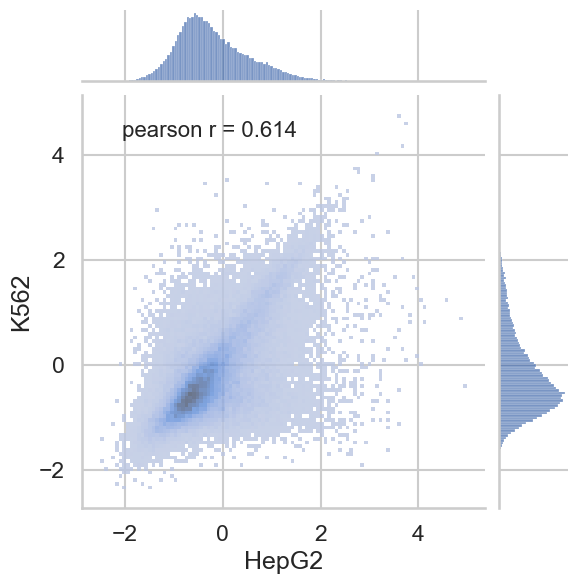

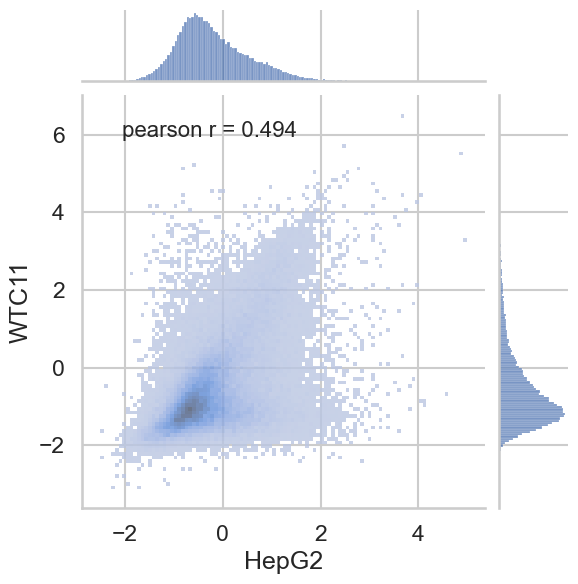

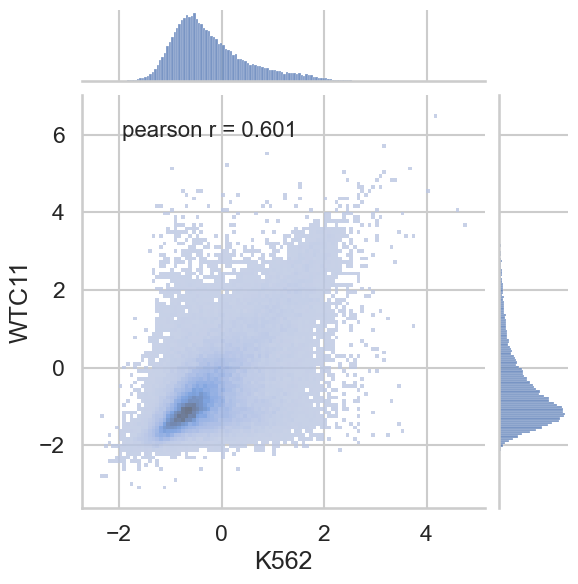

In [13]:
for cell_type_1, cell_type_2 in [('HepG2', 'K562'), ('HepG2', 'WTC11'), ('K562', 'WTC11')]:
    r = pearsonr(df[cell_type_1], df[cell_type_2])[0]
    print(f'{cell_type_1} {cell_type_2} pearson r = {r:.3f}')
    
    g = sns.jointplot(x=df[cell_type_1], y=df[cell_type_2], kind='hist', bins=100, alpha=0.8)
    g.fig.set_size_inches(6, 6)
    g.ax_joint.xaxis.set_major_locator(plt.MultipleLocator(2))
    g.ax_joint.yaxis.set_major_locator(plt.MultipleLocator(2))
    plt.text(0.1, 0.9, f'pearson r = {r:.3f}', transform=g.ax_joint.transAxes, fontsize=16)
    plt.savefig(f'Agarwal_MPRA_joint_{cell_type_1}_{cell_type_2}.png', dpi=300, bbox_inches='tight')